<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта,-загрузка-и-подготовка-данных" data-toc-modified-id="Описание-проекта,-загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта, загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Введение</a></span></li><li><span><a href="#Установка-и-импорт-библиотек" data-toc-modified-id="Установка-и-импорт-библиотек-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Установка и импорт библиотек</a></span></li><li><span><a href="#Объявление-функций" data-toc-modified-id="Объявление-функций-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Объявление функций</a></span></li><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Общая-информация-о-датасете" data-toc-modified-id="Общая-информация-о-датасете-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Общая информация о датасете</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-явных-дубликатов" data-toc-modified-id="Обработка-явных-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка явных дубликатов</a></span></li><li><span><a href="#Анализ-целевого-признака" data-toc-modified-id="Анализ-целевого-признака-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ целевого признака</a></span></li><li><span><a href="#Очистка-и-лемматизация-текста" data-toc-modified-id="Очистка-и-лемматизация-текста-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Очистка и лемматизация текста</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы</a></span></li><li><span><a href="#Дополнительная-работа-(BERT)" data-toc-modified-id="Дополнительная-работа-(BERT)-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Дополнительная работа (BERT)</a></span><ul class="toc-item"><li><span><a href="#Формирование-выборки-для-модели" data-toc-modified-id="Формирование-выборки-для-модели-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Формирование выборки для модели</a></span></li><li><span><a href="#Токенизация-текста" data-toc-modified-id="Токенизация-текста-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Токенизация текста</a></span></li><li><span><a href="#Создание-признаков-для-модели" data-toc-modified-id="Создание-признаков-для-модели-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Создание признаков для модели</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование-лучшей-модели" data-toc-modified-id="Тестирование-лучшей-модели-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Тестирование лучшей модели</a></span></li></ul></div>

## Описание проекта, загрузка и подготовка данных

### Введение
______
**Название проекта**  

Разработка инструмента для поиска токсичных комментариев пользователей интернет-магазина.
_____

**Цель исследования**  

Построение модели для классификации комментариев на позитивные и негативные при редактировании и дополнении пользователями описания товаров интернет-магазина.
_______
**Задачи исследования**

- Загрузить и подготовить данные
- Провести необходимую предобработку датасета
- Обучить разные модели с различными гиперпараметрами
- Проверить данные на тестовой выборке и сделать выводы.

Значение метрики **F1** на тестовой выборке должно быть не меньше **0,75**
_____
**Исходные данные**  

Имеются данные, представленные в виде одного датасета, содержащего следующую информацию:

- `text` — текст комментария    

целевой признак:
- `toxic` — позитивный/негативный комментарий

### Установка и импорт библиотек

In [1]:
!pip install spacy -q
!python -m spacy download en_core_web_sm -q
!pip install lightgbm scikit-learn -q
!pip install catboost -q

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import nltk
import lightgbm as lgb
import os
import math
import warnings
import re
import catboost
import sys
import spacy
import torch
import transformers

from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
from scipy.stats import uniform
from lightgbm import LGBMClassifier 
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import (
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    auc
)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dmitry\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# системные настройки
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
warnings.filterwarnings("ignore")

In [4]:
# объявление констант
RANDOM_STATE = 42
TEST_SIZE = 0.1

### Объявление функций

In [5]:
# функция для краткого обзора датасетов
def view_df(df):
    display(df.head()) 
    df.info() 
    display(df.columns) 
    display(df.describe())
    
# функция для описания категориальных признаков - круговая диаграмма
def pie_plot(df, list_col):
    i = 1
    plt.figure(figsize=(8, 8))
    for name in list_col:
        plt.subplot(3, 2, i)
        df[name].value_counts().plot.pie(label='', autopct='%1.0f%%', title=name)
        i +=1

    plt.tight_layout()
    plt.show();

### Загрузка данных

In [6]:
pth_1 = '/datasets/toxic_comments.csv'
pth_2 = r'C:\Ipynb\datasets\toxic_comments.csv'

if os.path.exists(pth_1):
    df = pd.read_csv(pth_1, index_col=[0])
    print('Использован путь:', pth_1)
elif os.path.exists(pth_2):
    df = pd.read_csv(pth_2, index_col=[0])
    print('Использован путь:', pth_2)
else:
    print('Something is wrong with loading data')

Использован путь: C:\Ipynb\datasets\toxic_comments.csv


### Общая информация о датасете

In [7]:
view_df(df)

,text,toxic
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0
1,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0
2,"Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",0
3,"""\nMore\nI can't make any real suggestions on improvement - I wondered if the section statistics should be later on, or a subsection of """"types of accidents"""" -I think the references may need tidying so that they are all in the exact same format ie date format etc. I can do that later on, if no-one else does first - if you have any preferences for formatting style on references or want to do it yourself please let me know.\n\nThere appears to be a backlog on articles for review so I guess there may be a delay until a reviewer turns up. It's listed in the relevant form eg Wikipedia:Good_article_nominations#Transport """,0
4,"You, sir, are my hero. Any chance you remember what page that's on?",0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 159292 entries, 0 to 159450
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159292 non-null  object
 1   toxic   159292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 3.6+ MB


Index(['text', 'toxic'], dtype='object')

,toxic
count,159292.000000
mean,0.101612
std,0.302139
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Вывод:** загружена и получена общая информация по датасету: пропуски в данных отсутствуют, тип данных соответствует описанию.  
Более подробный анализ, а также выявление дубликатов, будет произведено на следующем этапе обработки данных

##  Предобработка данных

### Обработка явных дубликатов

In [8]:
df.duplicated(subset = 'text').sum()

0

Дубликаты в комментариях отсутствуют

### Анализ целевого признака

Проанализируем распределение целевого признака `toxic`

In [9]:
round(df['toxic'].value_counts(normalize=True), 3)

0    0.898
1    0.102
Name: toxic, dtype: float64

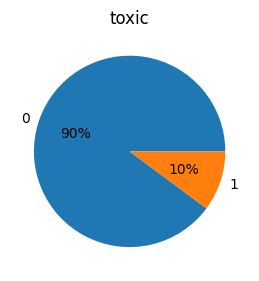

In [10]:
pie_plot(df, ['toxic'])

В целевом признаке `toxic` присутствует дисбаланс классов: 10% токсичных комментариев, учтем это при обучении модели.  

### Очистка и лемматизация текста

In [11]:
# Загрузка модели Spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Функция для очистки текста
def clear_text(text):
    clear_list = re.sub(r"[^a-zA-Z']", ' ', text)
    clear_text = ' '.join(clear_list.split())
    return clear_text

df['clean_text'] = df['text'].apply(lambda x: clear_text(x))

# Лемматизация с использованием пайплайна
lemm_texts = []
total = df.shape[0]
nlp_pipe = nlp.pipe(df['clean_text'].values, disable=['ner', 'parser'])

for doc in tqdm(nlp_pipe, total=total):
    lemm_text = " ".join([token.lemma_ for token in doc])
    lemm_texts.append(lemm_text)

df['lemm_text'] = lemm_texts

# Отображение результата
df.head(1)

100%|██████████| 159292/159292 [11:10<00:00, 237.55it/s]


,text,toxic,clean_text,lemm_text
0,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,Explanation Why the edits made under my username Hardcore Metallica Fan were reverted They weren't vandalisms just closure on some GAs after I voted at New York Dolls FAC And please don't remove the template from the talk page since I'm retired now,Explanation why the edit make under my username Hardcore Metallica Fan be revert they be not vandalism just closure on some gas after I vote at New York Dolls FAC and please do not remove the template from the talk page since I be retire now


## Обучение

Для подбора модели будем использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров `RandomizedSearchCV`. Выбор лучшей модели будет осуществляться на основе метрики — `F1`

В рамках пайплайна использовались следующие инструменты:    

- для преобразования текстовых данных в числовую матрицу на основе TF-IDF: `TfidfVectorizer`, в т.ч с использованием униграмм и биграмм

типы моделей:
- `LogisticRegression, RandomForestClassifier, KNeighborsClassifier, LGBMClassifier, CatBoostClassifier` со своими настройками гиперпараметров

Для удобства и сокращения времени проверки на ревью, путем проведения серии обучения моделей с подбором гиперпараметров, были определены их оптимальные значения, которые были зафиксированы в приведенном ниже пайплайне.

In [12]:
%%time
# разобъем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df['lemm_text'],
                                                    df['toxic'],
                                                    stratify = df['toxic'],
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

stop_words = list(stopwords.words('english'))

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([  
    ('vect', TfidfVectorizer(stop_words=stop_words,
                            min_df=0.0001,
                            max_df=0.95, 
                            ngram_range=(1, 2))),
    ('models', None)
])

param_grid = [
    
   # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)],
        'models__max_depth': [42],
        'models__min_samples_leaf': [3],
        'models__min_samples_split': [3],
        'models__n_estimators': [100]
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [31]
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)],
        'models__solver': ['saga'],
        'models__penalty': ['l2'],
        'models__C': [5]
    },

    # словарь для модели LGBMClassifier
    {
        'models': [LGBMClassifier(verbose=-1, random_state=RANDOM_STATE, n_jobs=1)],
        'models__num_leaves': [63],  
        'models__learning_rate': [0.05],  
        'models__n_estimators': [500],  
        'models__max_depth': [47],  
        'models__feature_fraction': [0.6]
    },
    
    # словарь для модели CatBoostClassifier
    {
        'models': [CatBoostClassifier(verbose=0, random_state=RANDOM_STATE)],
        'models__learning_rate': [0.05],  
        'models__iterations': [100]  
    }
]

randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='f1',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=5
)
randomized_search.fit(X_train, y_train)

display('Лучшая модель и её параметры:', randomized_search.best_params_)
print (f'Метрика F1, полученная с помощью кросс-валидации: {randomized_search.best_score_:.3f}')

'Лучшая модель и её параметры:'

{'models__num_leaves': 63,
 'models__n_estimators': 500,
 'models__max_depth': 47,
 'models__learning_rate': 0.05,
 'models__feature_fraction': 0.6,
 'models': LGBMClassifier(n_jobs=1, random_state=42, verbose=-1)}

Метрика F1, полученная с помощью кросс-валидации: 0.778
CPU times: total: 9min 25s
Wall time: 34min 56s


In [13]:
# Отобразим результаты работы со всеми моделями
result = pd.DataFrame(randomized_search.cv_results_)
result = result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
    ].sort_values('rank_test_score')
result.head(10)

,rank_test_score,param_models,mean_test_score,params
3,1,"LGBMClassifier(n_jobs=1, random_state=42, verbose=-1)",0.778103,"{'models__num_leaves': 63, 'models__n_estimators': 500, 'models__max_depth': 47, 'models__learning_rate': 0.05, 'models__feature_fraction': 0.6, 'models': LGBMClassifier(n_jobs=1, random_state=42, verbose=-1)}"
2,2,"LogisticRegression(class_weight='balanced', random_state=42)",0.751649,"{'models__solver': 'saga', 'models__penalty': 'l2', 'models__C': 5, 'models': LogisticRegression(class_weight='balanced', random_state=42)}"
4,3,<catboost.core.CatBoostClassifier object at 0x0000025A3A486220>,0.605600,"{'models__learning_rate': 0.05, 'models__iterations': 100, 'models': <catboost.core.CatBoostClassifier object at 0x0000025A3A486220>}"
0,4,"RandomForestClassifier(class_weight='balanced', random_state=42)",0.492324,"{'models__n_estimators': 100, 'models__min_samples_split': 3, 'models__min_samples_leaf': 3, 'models__max_depth': 42, 'models': RandomForestClassifier(class_weight='balanced', random_state=42)}"
1,5,KNeighborsClassifier(),0.138001,"{'models__n_neighbors': 31, 'models': KNeighborsClassifier()}"


**Вывод:** моделью, показавшей наилучшие результаты метрики `F1` равное 0.778 на кроссвалидационной выборке, стала `LGBMClassifier` с параметрами: число листьев - 63, скорость обучения - 0.05, количество деревьев - 500, максимальная глубина - 47, доля признаков для обучения - 0.6.

## Тестирование лучшей модели

Проведем анализ лучшей модели на основе матрицы ошибок и ROC-кривой модели

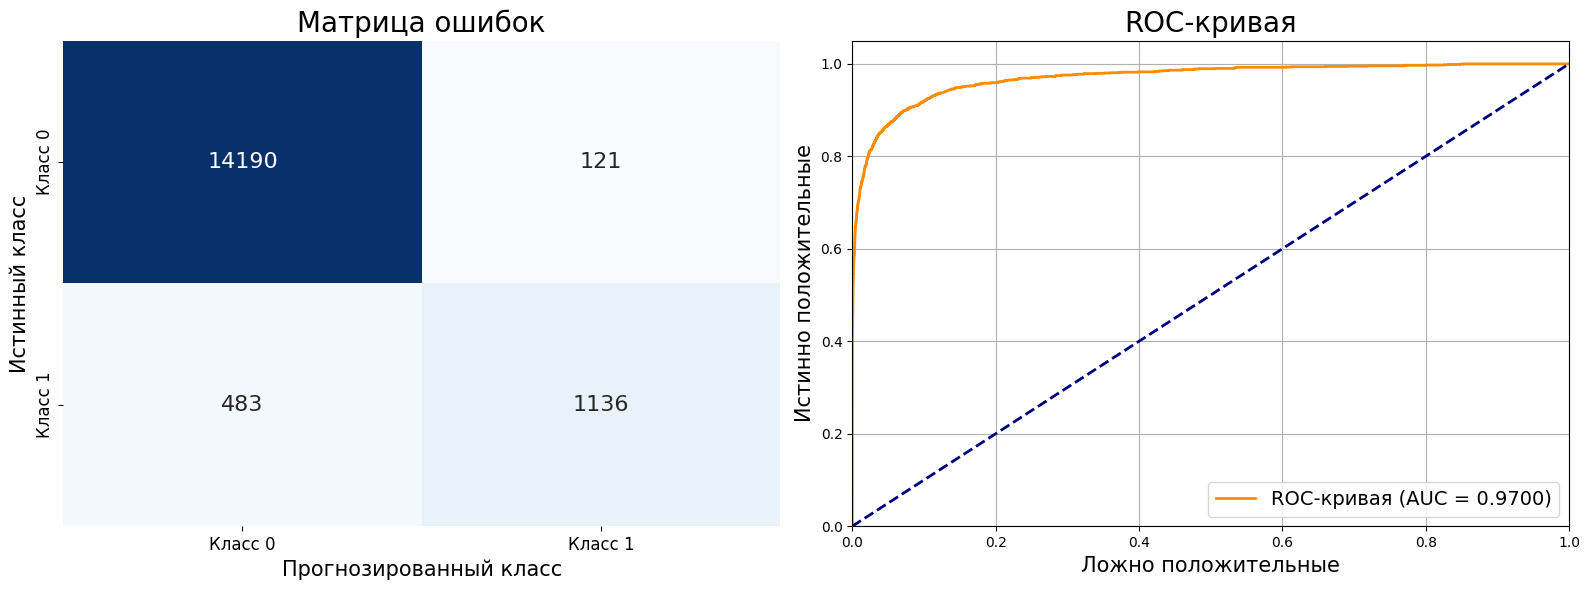

In [14]:
# Предсказания меток и вероятностей
y_pred = randomized_search.predict(X_test)
y_probа = randomized_search.predict_proba(X_test)[:, 1]

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_probа)
roc_auc = auc(fpr, tpr)

# Отображение объектов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Матрица ошибок
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, ax=ax1)
ax1.set_title('Матрица ошибок', fontsize=20)
ax1.set_xlabel('Прогнозированный класс', fontsize=15)
ax1.set_ylabel('Истинный класс', fontsize=15)
ax1.set_xticks([0.5, 1.5])
ax1.set_xticklabels(['Класс 0', 'Класс 1'], fontsize=12)
ax1.set_yticks([0.5, 1.5])
ax1.set_yticklabels(['Класс 0', 'Класс 1'], fontsize=12)

# ROC-кривая
ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (AUC = %0.4f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Ложно положительные', fontsize=15)
ax2.set_ylabel('Истинно положительные', fontsize=15)
ax2.set_title('ROC-кривая', fontsize=20)
ax2.legend(loc="lower right", fontsize=14)
ax2.grid(True)

plt.tight_layout()
plt.show()

**Вывод:** матрица ошибок показывает, что модели есть куда улучшаться, она значительно лучше справляется с классификацией объектов класса 0, чем с классификацией объектов класса 1. Одно из возможных решений - использование моделей не просто анализирующих фразы, но и понимающих контекст запросов, например, предобученной на большом корпусе данных модели BERT.
ROC-кривая находится выше диагонали, что говорит о том, что наша модель лучше случайной и значение AUC указывает на хорошую общую способность модели различать классы.

Расчитаем метрику F1 для лучшей модели на тестовых данных

In [15]:
f1 = f1_score(y_test, y_pred)
print(f'Метрика F1 на тестовых данных: {f1:.3f}')

Метрика F1 на тестовых данных: 0.790


Метрика `F1`, полученная на тестовых данных с использованием лучшей модели, составила `0.79`, что удовлетворяет заданному значению по проекту

## Выводы

**В рамках проекта был проведен:** анализ данных, в т.ч. графический. Проведена очистка и лемматизация комментариев, сформированы новые признаки для обучения моделей на основе TF-IDF: `TfidfVectorizer`, в т.ч с использованием униграмм и биграмм.

С целью классификации комментариев обучены 5 моделей, расчитана метрика `F1` и отобрана лучшая модель на основе данной метрики. Произведен анализ лучшей модели на основе матрицы ошибок и ROC-кривой, рассчитан прогноз и метрика для лучшей модели на тестовых данных.
_____________

**На этапе предобработки данных:** загружена и получена общая информация по датасету: пропуски в данных отсутствуют, тип данных соответствует описанию. 

**На этапе анализа и подготовки данных:** проведен анализ распределения целевого признака. Проведена очистка и лемматизация всего объема комментариев, сформированы новые признаки для обучения моделей с помощью преобразования текстовых данных в числовую матрицу на основе TF-IDF: `TfidfVectorizer`, в т.ч с использованием униграмм и биграмм.

**На этапе обучения и выбора лучшей модели:** с использованием пайплайнов обучены 5 моделей: `LogisticRegression`, `RandomForestClassifier`, `KNeighborsClassifier`, `LGBMClassifier`,  `CatBoostClassifier`. Для каждой из моделей подобраны оптимальные гиперпараметры. Для выбора лучшей модели использовалась заданная метрика `F1`.    

Моделью, показавшей наилучшие результаты метрики `F1` на кроссвалидационной выборке, стала `LGBMClassifier` с параметрами: число листьев - 63, скорость обучения - 0.05, количество деревьев - 500, максимальная глубина - 47, доля признаков для обучения - 0.6.    
С использованием данной модели `F1`, полученная с помощью кросс-валидации, составила `0.778`

**На этапе тестирования лучшей модели:** Произведен анализ лучшей модели на основе матрицы ошибок и ROC-кривой, который показал, что модель лучше справляется с классификацией объектов класса 0, чем с классификацией объектов класса 1. Одно из возможных решений - использование моделей не просто анализирующих фразы, но и понимающих контекст запросов, например, предобученной на большом корпусе данных модели BERT.
ROC-кривая и значение AUC указывают на хорошую общую способность модели различать классы.    
Рассчитаннная для лучшей модели метрика `F1` на тестовых данных составила `0.79`. 

С учетом вышеизложенного модель `LGBMClassifier` может быть рекомендована для использования при классификации комментариев пользователей на позитивные и негативные.

## Дополнительная работа (BERT)

Проведем дополнительно (вне основного задания) аналогичный расчет метрики F1 с использованием предобученной модели `toxic-bert`

### Формирование выборки для модели

Сформируем выборку из общего датасета с сохранением пропорции классов

In [16]:
sample_size = 2000

# Поддержание пропорций
class_1_sample = df[df['toxic'] == 1].sample(n=round(sample_size * len(df[df['toxic'] == 1]) / len(df)), 
                                             random_state=RANDOM_STATE)
class_0_sample = df[df['toxic'] == 0].sample(n=round(sample_size * len(df[df['toxic'] == 0]) / len(df)), 
                                             random_state=RANDOM_STATE)

# Объединение и перемешивание данных
df_sample = pd.concat([class_1_sample, class_0_sample])\
              .sample(frac=1, random_state=RANDOM_STATE).reset_index(drop=True)

print(df_sample.shape,'\n', df_sample['toxic'].value_counts(normalize=True))

(2000, 4) 
 0    0.8985
1    0.1015
Name: toxic, dtype: float64


### Токенизация текста

Учтем, что тензоры модели BERT обрабатывают последовательности не более 512 токенов

In [17]:
# Инициализируем токенайзер модели BERT с подготовленным словарем
tokenizer = AutoTokenizer.from_pretrained("unitary/toxic-bert")

# Токенизация
tokenized = df_sample['text'].apply(lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, 
                                                               truncation=True))
# Дополнение токенов до максимальной длины
padded = tokenized.apply(lambda x: x + [0]*(512 - len(x)))
padded = np.array(padded.tolist())
print(padded[0][:20])

# Создание "маски внимания"
attention_mask = np.where(padded != 0, 1, 0)
print(attention_mask.shape)

[  101  4165  2066  1037  2933 10856 10695   102     0     0     0     0
     0     0     0     0     0     0     0     0]
(2000, 512)


### Создание признаков для модели

Преобразование текстов в эмбеддинги с использованием предобученной модели `toxic-bert`

In [18]:
model = AutoModelForSequenceClassification.from_pretrained("unitary/toxic-bert")

# Создаем эмбеддинги батчами
batch_size = 100
embeddings = []
for i in tqdm(range(padded.shape[0] // batch_size)):
    batch = torch.LongTensor(padded[batch_size*i:batch_size*(i+1)]) 
    attention_mask_batch = torch.LongTensor(attention_mask[batch_size*i:batch_size*(i+1)])

# Для ускорения вычисления в библиотеке torch укажем, что градиенты не нужны: модель дообучать не будем.
    with torch.no_grad():
        batch_embeddings = model(batch, attention_mask=attention_mask_batch)
    embeddings.append(batch_embeddings[0].numpy())    

# Сбор эмбеддингов в матрицу признаков
features = np.concatenate(embeddings)
features.shape

100%|██████████| 20/20 [41:05<00:00, 123.28s/it]


(2000, 6)

## Обучение

Для подбора модели будем использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров `GridSearchCV`. Выбор лучшей модели будет осуществляться на основе метрики — `F1`

В рамках пайплайна использовались следующие типы моделей:    

- `LogisticRegression, RandomForestClassifier, KNeighborsClassifier, LGBMClassifier, CatBoostClassifier` со своими настройками гиперпараметров

Для удобства и сокращения времени проверки на ревью, путем проведения серии обучения моделей с подбором гиперпараметров, были определены их оптимальные значения, которые были зафиксированы в приведенном ниже пайплайне.

In [19]:
%%time
# разобъем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features,
                                                    df_sample['toxic'],
                                                    stratify = df_sample['toxic'],
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([  
    ('models', None)
])

param_grid = [
    
    # словарь для модели RandomForestClassifier()
    {
        'models': [RandomForestClassifier(class_weight='balanced', random_state=RANDOM_STATE)],
        'models__max_depth': [25],
        'models__min_samples_leaf': [5],
        'models__min_samples_split': [5],
        'models__max_features': [3],
        'models__n_estimators': [200]
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': [13]
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(class_weight='balanced', random_state=RANDOM_STATE)],
        'models__solver': ['saga'],
        'models__penalty': ['l1'],
        'models__C': [3]
    },
    
    # словарь для модели SVC()
    {
        'models': [SVC(probability=True, class_weight='balanced', random_state=RANDOM_STATE)],
        'models__kernel': ['poly'],
        'models__degree': [3],
        'models__C': [10],
        'models__gamma': [0.01]
    },
  
    # словарь для модели LGBMClassifier
    {
        'models': [LGBMClassifier(verbose=-1, random_state=RANDOM_STATE, n_jobs=1)],
        'models__num_leaves': [20],  # число листьев
        'models__learning_rate': [0.05],  # скорость обучения
        'models__n_estimators': [300],  # количество деревьев
        'models__max_depth': [5],  # максимальная глубина
        'models__feature_fraction': [0.6]  # доля признаков для обучения
    },
    
    # словарь для CatBoostClassifier
    {
        'models': [CatBoostClassifier(verbose=0, random_state=RANDOM_STATE)],
        'models__depth': [10],  # глубина деревьев
        'models__learning_rate': [0.01],  # скорость обучения
        'models__iterations': [100]  # количество итераций
    }
]

grid_search = GridSearchCV(
    pipe_final, 
    param_grid, 
    scoring='f1', 
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

display('Лучшая модель и её параметры:', grid_search.best_params_)
print (f'Метрика F1, полученная с помощью кросс-валидации: {grid_search.best_score_:.3f}')

Fitting 5 folds for each of 6 candidates, totalling 30 fits


'Лучшая модель и её параметры:'

{'models': <catboost.core.CatBoostClassifier at 0x25a3a486910>,
 'models__depth': 10,
 'models__iterations': 100,
 'models__learning_rate': 0.01}

Метрика F1, полученная с помощью кросс-валидации: 0.934
CPU times: total: 1.88 s
Wall time: 10.3 s


In [20]:
results = pd.DataFrame(grid_search.cv_results_)
results['model_name'] = results['param_models'].apply(lambda x: type(x).__name__)

# Группировка по имени модели и нахождение лучшего score для каждой модели
best_scores = results.groupby('model_name')['mean_test_score'].max().sort_values(ascending=False)

print("Лучшие метрики F1 для каждой модели:")
print(best_scores)

Лучшие метрики F1 для каждой модели:
model_name
CatBoostClassifier        0.934269
RandomForestClassifier    0.930371
KNeighborsClassifier      0.926357
SVC                       0.924654
LogisticRegression        0.923536
LGBMClassifier            0.917116
Name: mean_test_score, dtype: float64


**Вывод:** с использованием модели `toxic-bert` метрика `F1` по всем моделям превысила значение 0,9 и значительно превысила значение метрики лучшей модели 0.778, обученной на основе TF-IDF.

## Тестирование лучшей модели

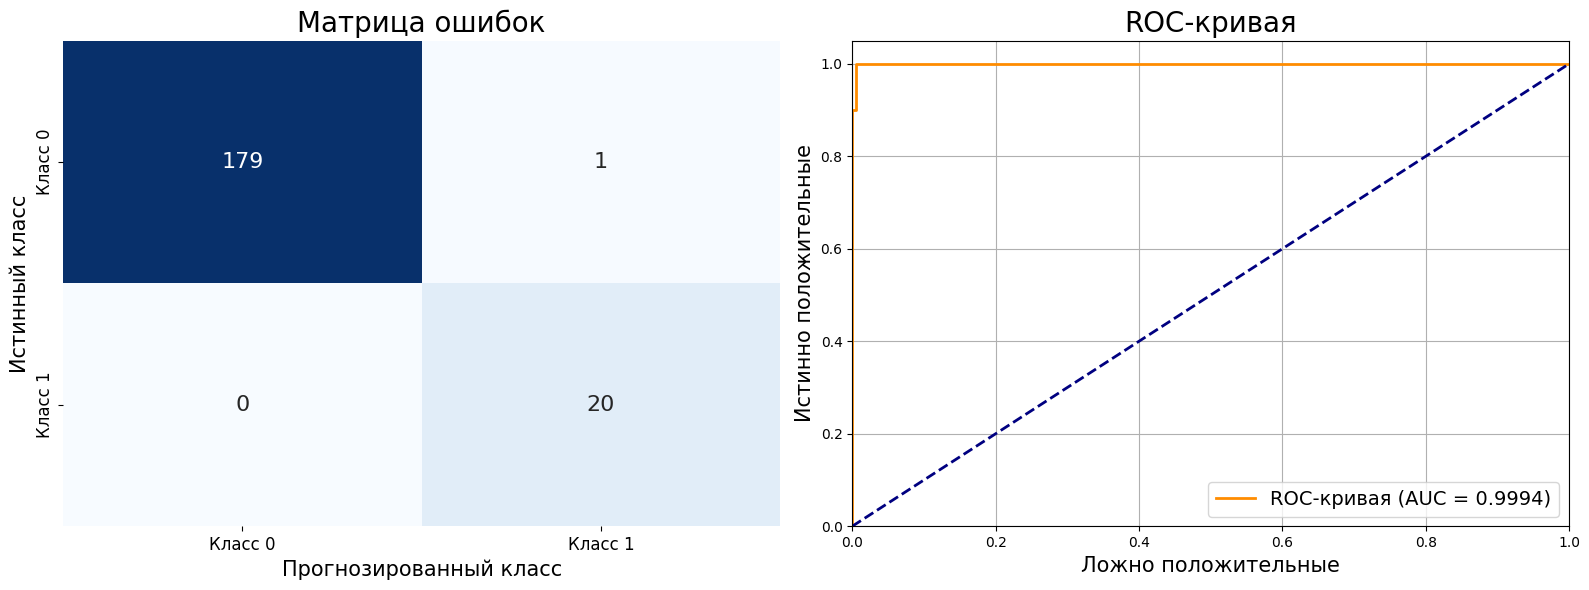

In [21]:
# Предсказания меток и вероятностей
y_pred = grid_search.predict(X_test)
y_probа = grid_search.predict_proba(X_test)[:, 1]

# Построение матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_probа)
roc_auc = auc(fpr, tpr)

# Отображение объектов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Матрица ошибок
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16}, ax=ax1)
ax1.set_title('Матрица ошибок', fontsize=20)
ax1.set_xlabel('Прогнозированный класс', fontsize=15)
ax1.set_ylabel('Истинный класс', fontsize=15)
ax1.set_xticks([0.5, 1.5])
ax1.set_xticklabels(['Класс 0', 'Класс 1'], fontsize=12)
ax1.set_yticks([0.5, 1.5])
ax1.set_yticklabels(['Класс 0', 'Класс 1'], fontsize=12)

# ROC-кривая
ax2.plot(fpr, tpr, color='darkorange', lw=2, label='ROC-кривая (AUC = %0.4f)' % roc_auc)
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('Ложно положительные', fontsize=15)
ax2.set_ylabel('Истинно положительные', fontsize=15)
ax2.set_title('ROC-кривая', fontsize=20)
ax2.legend(loc="lower right", fontsize=14)
ax2.grid(True)

plt.tight_layout()
plt.show()

Расчитаем метрику F1 для лучшей модели на тестовых данных

In [22]:
f1 = f1_score(y_test, y_pred)
print(f'Метрика F1 на тестовых данных: {f1:.3f}')

Метрика F1 на тестовых данных: 0.976


Метрика F1 на тестовых данных лучшей модели, обученной на основе TF-IDF: **0.79**